# 1-12-23

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pylab import rcParams
rcParams['figure.figsize']=20,8
plt.style.use('ggplot')

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import io
import requests
import urllib

In [81]:
df=pd.read_csv('DATA/used_cars.csv')
df.head()

,price,trim,isOneOwner,mileage,year,color,displacement
0,43995,550,f,36858.0,2008,Silver,5.5
1,44995,550,f,46883.0,2012,Black,4.6
2,25999,550,f,108759.0,2007,White,5.5
3,33880,550,f,35187.0,2007,Black,5.5
4,34895,550,f,48153.0,2007,Black,5.5


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         1000 non-null   int64  
 1   trim          1000 non-null   object 
 2   isOneOwner    1000 non-null   object 
 3   mileage       1000 non-null   float64
 4   year          1000 non-null   int64  
 5   color         1000 non-null   object 
 6   displacement  1000 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 54.8+ KB


In [83]:
df.isna().sum()

price           0
trim            0
isOneOwner      0
mileage         0
year            0
color           0
displacement    0
dtype: int64

## Isolate Numeric Columns

In [84]:
df_numeric=df[['price', 'mileage', 'year']]
df_numeric

,price,mileage,year
0,43995,36858.0,2008
1,44995,46883.0,2012
2,25999,108759.0,2007
3,33880,35187.0,2007
4,34895,48153.0,2007
...,...,...,...
995,36995,89589.0,2007
996,72991,5562.0,2013
997,38990,61716.0,2010
998,58998,40219.0,2012


In [166]:
df_numeric = df_numeric[['price','mileage','year']]
df_numeric.iloc[:,0]  /= 1000
df_numeric.iloc[:,1]  /= 1000

In [167]:
df_numeric.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1000.0,30.583318,18.411018,0.995,12.99500,29.8000,43.99200,79.995
mileage,1000.0,73.652408,42.887422,1.997,40.13275,67.9195,100.13825,255.419
year,1000.0,2006.939000,4.194624,1994.000,2004.00000,2007.0000,2010.00000,2013.000


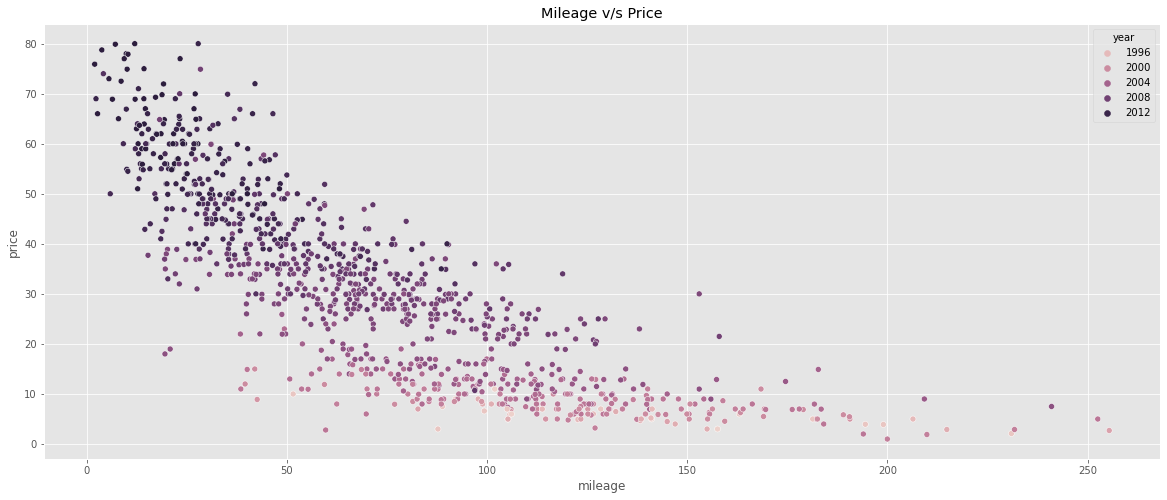

In [168]:
sns.scatterplot(x=df_numeric['mileage'], y=df_numeric['price'], hue=df_numeric['year'])
plt.title('Mileage v/s Price');

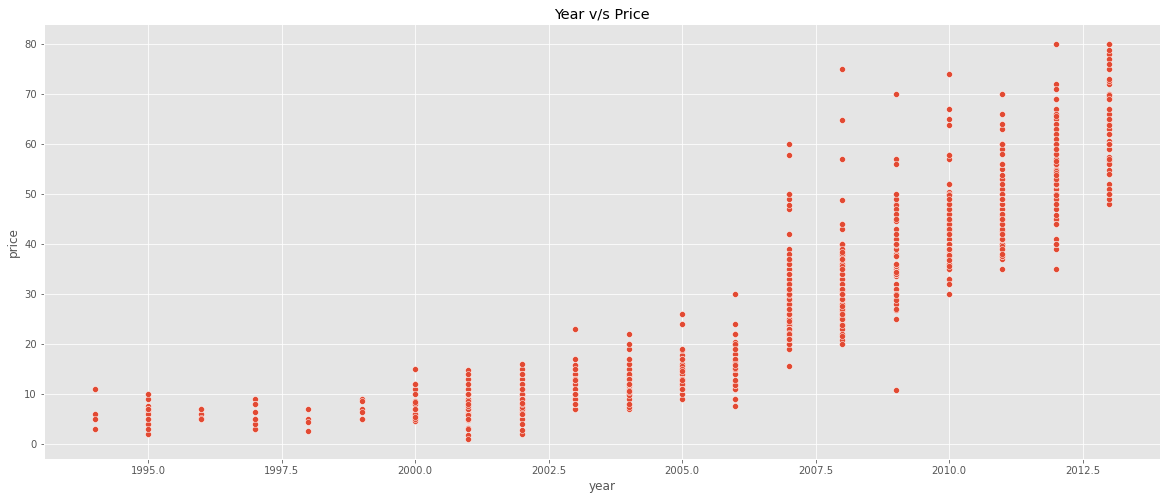

In [170]:
sns.scatterplot(x=df_numeric['year'], y=df_numeric['price'])
plt.title('Year v/s Price');

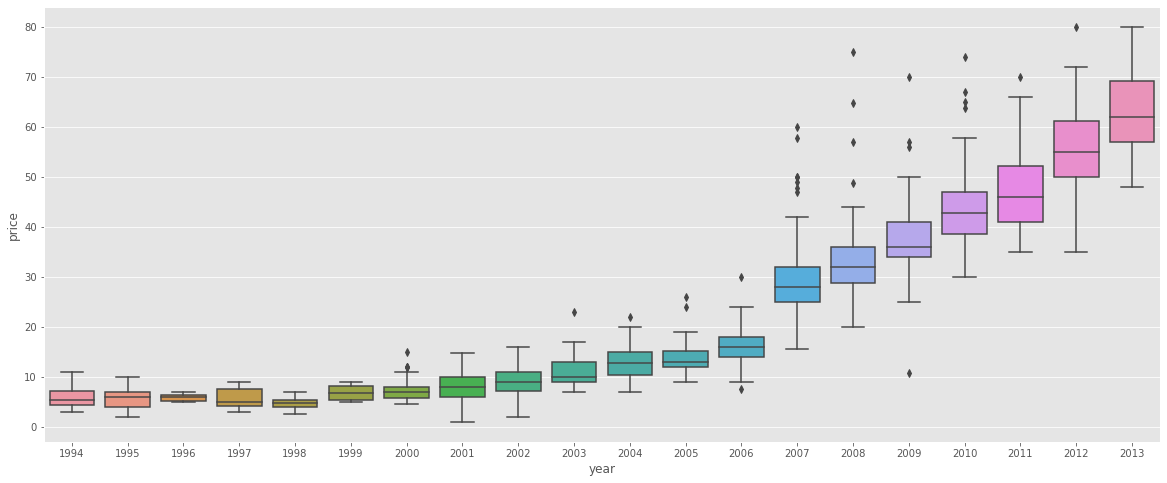

In [171]:
sns.boxplot(x=df_numeric['year'], y=df_numeric['price']);

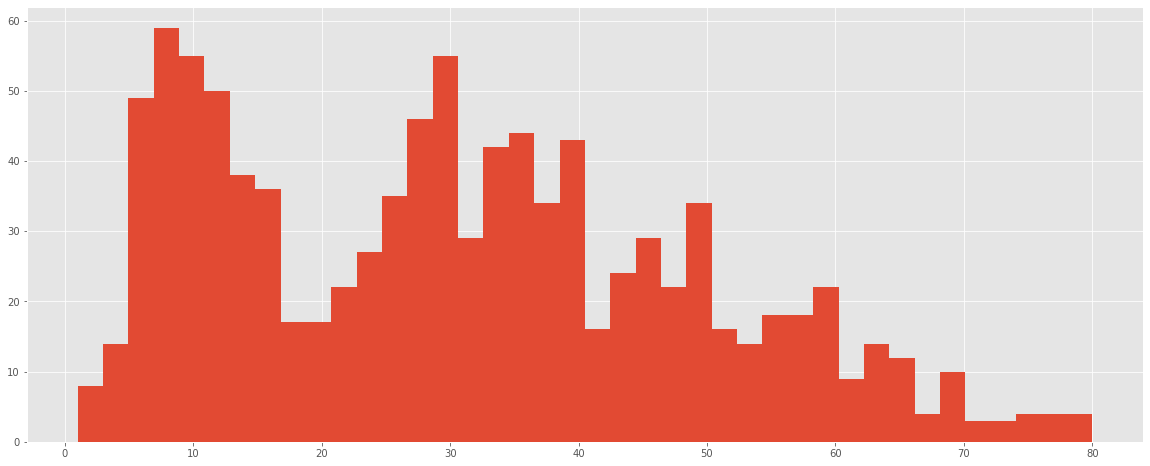

In [172]:
plt.hist(df_numeric['price'], bins=40);

## Add Color Column

In [176]:
df_categorical=df[['price', 'mileage', 'year', 'color']]
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   price    1000 non-null   int64
 1   mileage  1000 non-null   int64
 2   year     1000 non-null   int64
 3   color    1000 non-null   int64
dtypes: int64(4)
memory usage: 31.4 KB


In [177]:
df_categorical['color'].value_counts()

0    415
3    227
1    213
2    145
Name: color, dtype: int64

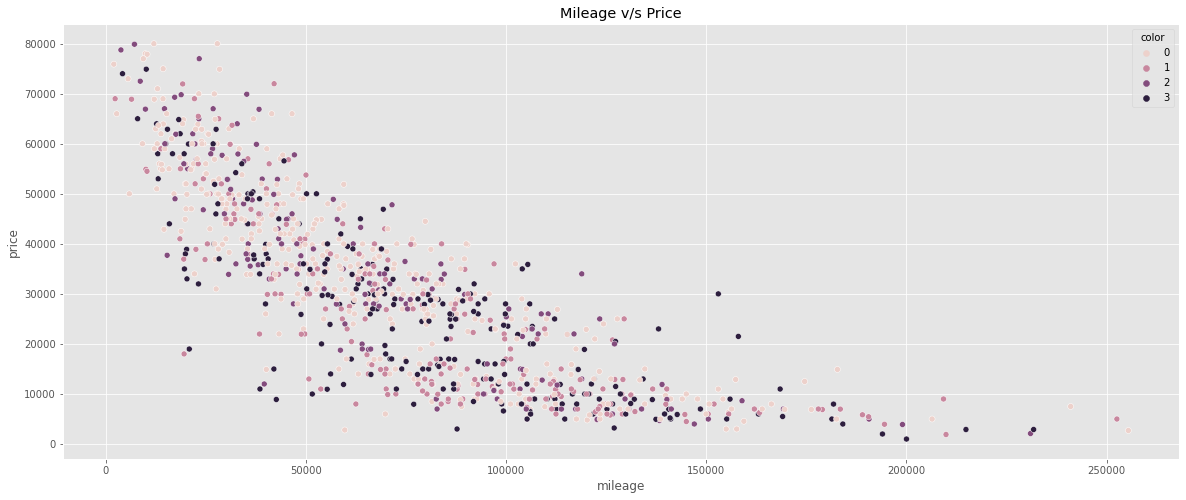

In [179]:
sns.scatterplot(x=df_categorical['mileage'], y=df_categorical['price'], hue=df_categorical['color'])
plt.title('Mileage v/s Price');

## Regression with Mileage

In [93]:
import numpy as np
from sklearn.linear_model import LinearRegression

x = np.array(df['price']).reshape((-1, 1))
y = np.array(df['mileage'])

model = LinearRegression().fit(x, y) 

In [94]:
model.intercept_

131732.23253086765

In [95]:
model.coef_

array([-1.89906878])

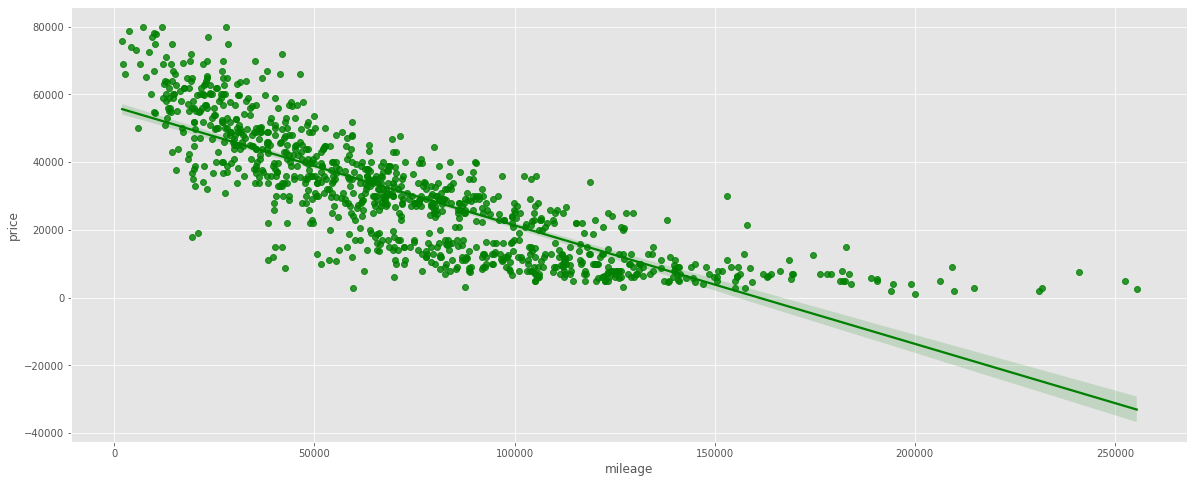

In [96]:
sns.regplot(x=df['mileage'], y=df['price'], color='g');

# 1-17-23

In [102]:
import statsmodels.api as sm

## Using Mileage & Color to get the Price

In [106]:
df.head()

,price,trim,isOneOwner,mileage,year,color,displacement
0,43995,550,f,36858.0,2008,Silver,5.5
1,44995,550,f,46883.0,2012,Black,4.6
2,25999,550,f,108759.0,2007,White,5.5
3,33880,550,f,35187.0,2007,Black,5.5
4,34895,550,f,48153.0,2007,Black,5.5


In [107]:
from sklearn.preprocessing import LabelEncoder
categorical = ['color']

le = LabelEncoder()
for col in categorical:
    le.fit(df[col])
    df[col] = le.transform(df[col])

In [108]:
df.head()

,price,trim,isOneOwner,mileage,year,color,displacement
0,43995,550,f,36858.0,2008,1,5.5
1,44995,550,f,46883.0,2012,0,4.6
2,25999,550,f,108759.0,2007,2,5.5
3,33880,550,f,35187.0,2007,0,5.5
4,34895,550,f,48153.0,2007,0,5.5


In [110]:
df['mileage']=df['mileage'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         1000 non-null   int64 
 1   trim          1000 non-null   object
 2   isOneOwner    1000 non-null   object
 3   mileage       1000 non-null   int64 
 4   year          1000 non-null   int64 
 5   color         1000 non-null   int64 
 6   displacement  1000 non-null   object
dtypes: int64(4), object(3)
memory usage: 54.8+ KB


In [185]:
x=df[['mileage', 'year']].to_numpy()
y=df['price'].values

In [186]:
from sklearn.linear_model import LinearRegression
model=LinearRegression(fit_intercept=True)
model.fit(x,y)
print("Model Slopes:    ",model.coef_)
print("Model Intercept:",model.intercept_)

Model Slopes:     [-1.53721903e-01  2.69434954e+03]
Model Intercept: -5365489.872256995


In [188]:
preds=model.predict(x)

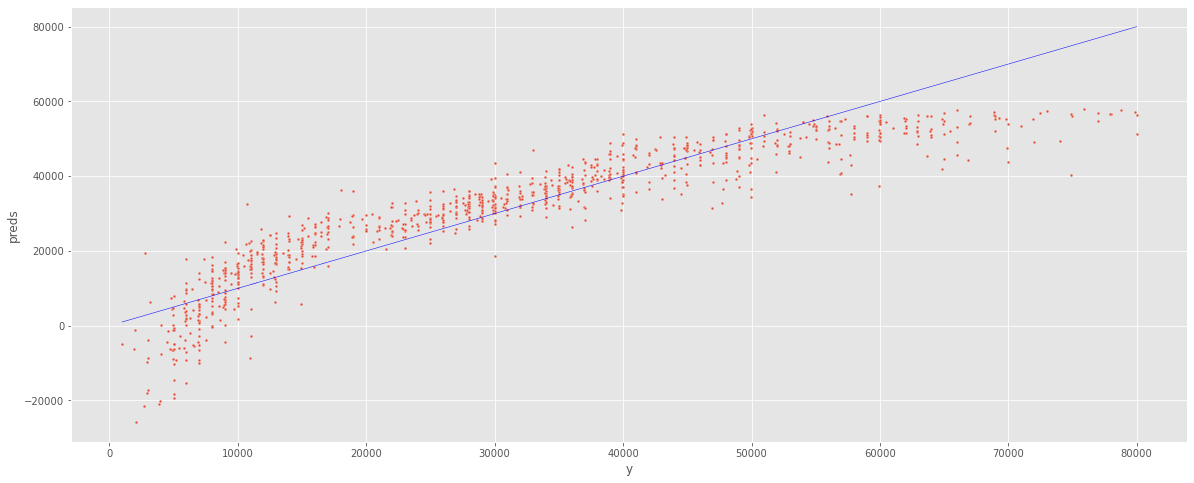

In [199]:
sns.scatterplot(y, preds, s=7)
sns.lineplot(y,y, color='b', linewidth=0.5)
plt.xlabel("y")
plt.ylabel("preds");